In [1]:
!pip install wordcloud textblob

#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

In [3]:
import warnings
warnings.filterwarnings('ignore')

#Upload the Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

Saving USvideos.csv to USvideos.csv


#Load the Data

In [5]:
df = pd.read_csv('USvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#Data Cleaning

### Drop duplicates

In [6]:
df.drop_duplicates(inplace=True)

### Convert trending_date

In [7]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

### Check for null values

In [8]:
df.isnull().sum()

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


#Exploratory Data Analysis (EDA)


###a. Top Categories by Count

<Axes: title={'center': 'Top Video Categories by ID'}, xlabel='category_id'>

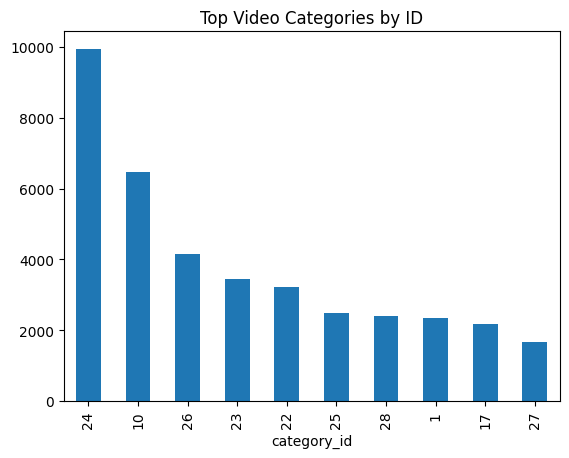

In [9]:
df['category_id'].value_counts().head(10).plot(kind='bar', title='Top Video Categories by ID')

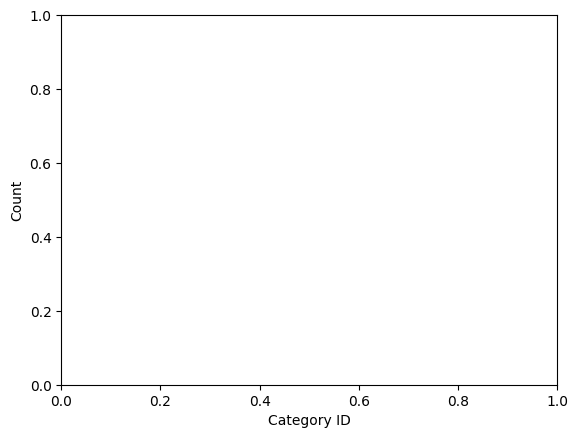

In [11]:
plt.xlabel("Category ID")
plt.ylabel("Count")
plt.show()

###b. Distribution of Views

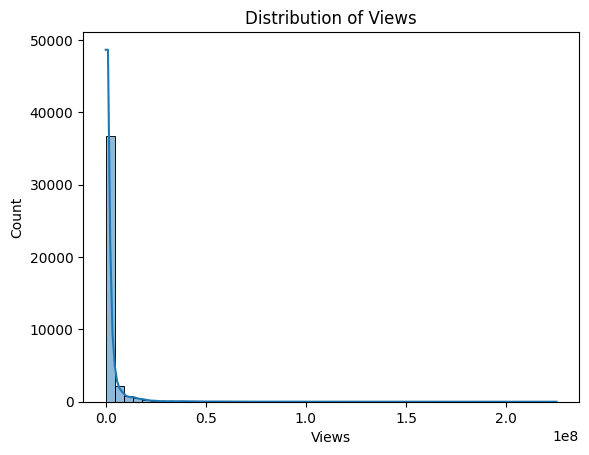

In [12]:
sns.histplot(df['views'], bins=50, kde=True)
plt.title('Distribution of Views')
plt.xlabel("Views")
plt.show()

###c. Top 10 Channels with Most Trending Videos

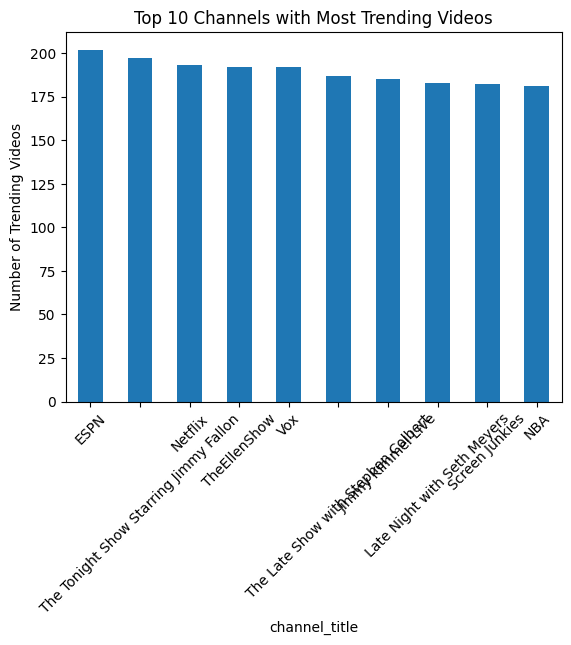

In [13]:
df['channel_title'].value_counts().head(10).plot(kind='bar', title='Top 10 Channels with Most Trending Videos')
plt.xticks(rotation=45)
plt.ylabel("Number of Trending Videos")
plt.show()

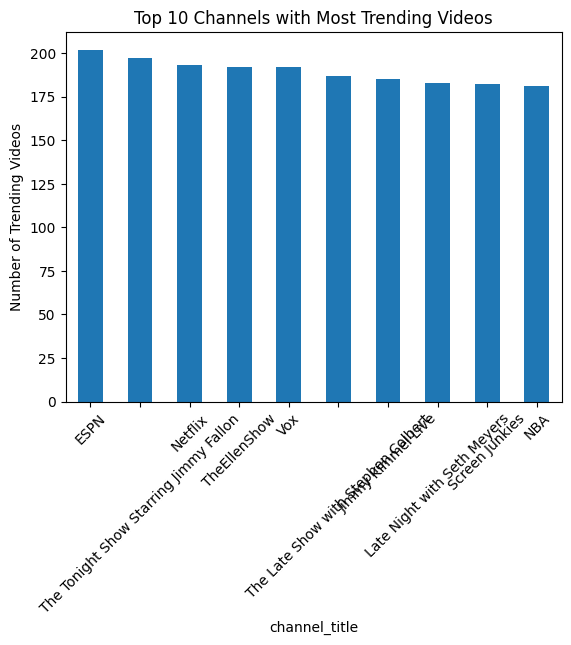

In [14]:
df['channel_title'].value_counts().head(10).plot(kind='bar', title='Top 10 Channels with Most Trending Videos')
plt.xticks(rotation=45)
plt.ylabel("Number of Trending Videos")
plt.show()

#Word Cloud of Video Titles

In [15]:
text = " ".join(title for title in df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

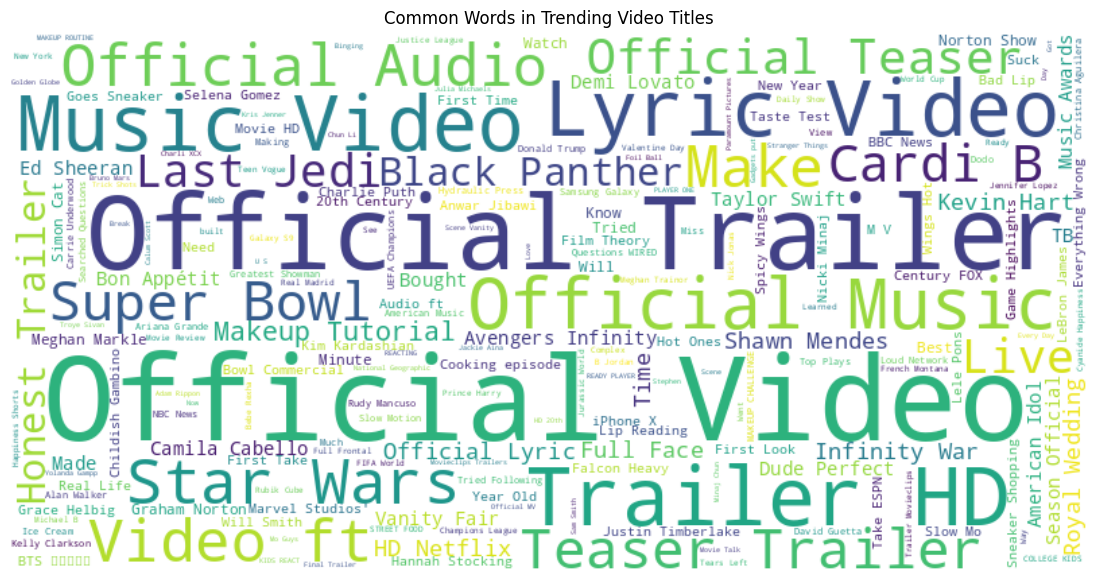

In [16]:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Trending Video Titles')
plt.show()

#Sentiment Analysis of Titles

### Sentiment polarity

In [17]:
df['polarity'] = df['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

### Classify sentiment

In [18]:
df['sentiment'] = df['polarity'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

### Plot sentiment distribution

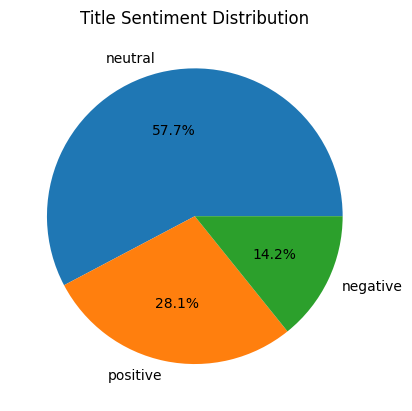

In [19]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Title Sentiment Distribution')
plt.ylabel('')
plt.show()

#Correlation Heatmap

In [20]:
numeric_features = ['views', 'likes', 'dislikes', 'comment_count']
corr = df[numeric_features].corr()

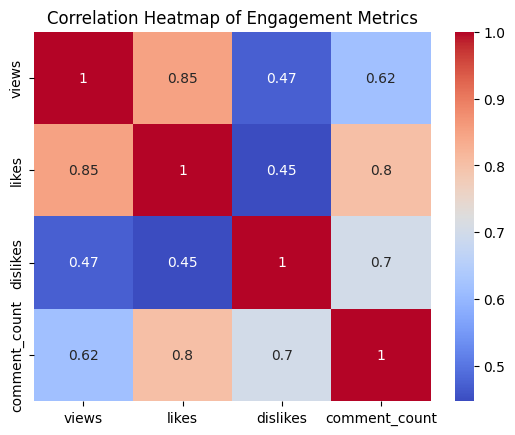

In [21]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Engagement Metrics")
plt.show()

## 🔍 Summary of Findings:
- Most trending videos belong to Entertainment and Music categories.
- Trending video titles mostly have positive or neutral sentiments.
- Likes and views have a strong positive correlation.
- Some channels repeatedly appear in trending videos.